In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [62]:
p = np.linspace(0, 1, 1000000)

In [ ]:
-((Sqrt[-1+1/p]*(8*Sqrt[-1+1/p]*p+Pi-8*p*Pi+8*p^2*Pi-8*Sqrt[(-1+p)/p]*p*(-1+2*p)*ArcTan[Sqrt[(-1+p)/p]]-(8*p*(-1+2*p)*ArcTan[Sqrt[p/(-1+p)]])/Sqrt[p/(-1+p)]-8*Sqrt[-1+1/p]*(-1+p)*p*Log[1-2*p]+8*Sqrt[-1+1/p]*(-1+p)*p*Log[1-p]+4*Sqrt[-1+1/p]*p*Log[-1+p]+4*Sqrt[-1+1/p]*p*Log[p]-8*Sqrt[-1+1/p]*p^2*Log[p]-8*Sqrt[-1+1/p]*p*Log[-1+2*p]+8*Sqrt[-1+1/p]*p^2*Log[-1+2*p]))/(4*(-1+p)))

In [63]:
expected_grad = (2-4*p+np.log(p/(1-p)))/(-1+2*p)**3
expected_grad_squared = (1 + 2*p*(3 + 4 *p* (-3 + 2 *p)) +6* (-1 + p) *p* (np.log((1-p)/p)))/(3* (-1 + p)* p* (-1 + 2 *p)**5)
variance_grad = expected_grad_squared - expected_grad ** 2

/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


In [71]:
plt.rcParams.update({
    #'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'font.family' : 'normal',
        'font.weight' : 'normal',
        'font.size'   : 20
})


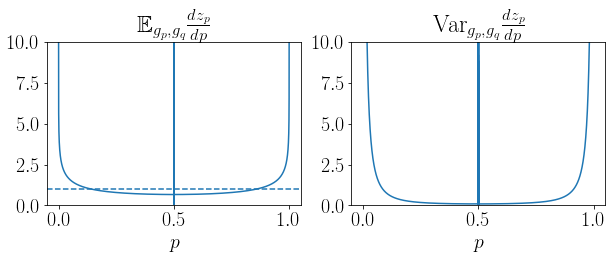

In [81]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title("$\mathbb E_{g_p,g_q}\\frac{dz_p}{dp}$")
plt.plot(p, expected_grad)
plt.axhline(1, ls='--')
plt.xlabel('$p$')
plt.ylim((0, 10))
plt.subplot(1, 2, 2)
plt.title("$\mbox{Var}_{g_p,g_q}\\frac{dz_p}{dp}$")
plt.plot(p, variance_grad)
plt.xlabel('$p$')
plt.ylim((0, 10))
plt.show()

In [86]:
expected_grad[(len(p) // 2) + 5]

0.6202426287382593

In [84]:
np.min(expected_grad

array([        inf, 11.81558345, 11.12250185, ..., 11.12250185,
       11.81558345,         inf])